####Day Two - 100 Days challange in Data Science

# Skewness

**Skewness** measures the symmetry of a distribution. It shows how much the distribution deviates from a normal distribution 
 * Negetive skewness : The mass of the distribution is concentrated on the right , usually a right learning curve  
* Posotive skewness : the mass of the distribution is concentrated on the left usually let - learning curve Let's compute skewness in the following code block:

In [20]:
#import state data set 
import pandas as pd 
data = pd.read_csv("state.csv")
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [21]:
# skewness of murder.rate column
data['Murder.Rate'].skew()

0.7806107129502482

In the preceding code block, I have computed the skewness of the  murder.rate column using the skew() method

**Kurtosis** measures the tailedness (thickness of tail) compared to a normal distribution. High
kurtosis is heavy-tailed, which means more outliers are present in the observations, and
low values of kurtosis are light-tailed

**High kurtosis** in a data set is an indicator that data has heavy outliers.

**Low kurtosis** in a data set is an indicator that data has lack of outliers.

In [22]:
# kurtosis of murder.rate column
data['Murder.Rate'].kurtosis()

1.0234134299094642

# Covariance and Correlation

Covariance and Correlation
There may be complex and unknown relationships between the variables in our data and meeasuring this will be helpfull for data analysts to understand and discover the dynamics between the variables as well this knowledge can help us better prepare our data to meet the expectations of machine learning algorithms, such as linear regression so the great way to understand the relationship between the variables is covariance and correlation .
Covariance directional association between the variables

In [23]:
### # Covariance between columns of dataframe
data.cov()

,Population,Murder.Rate
Population,4.689833e+13,2.388643e+06
Murder.Rate,2.388643e+06,3.670045e+00


In [24]:
# Correlation between columns of our data set
data.corr(method ='pearson')

,Population,Murder.Rate
Population,1.000000,0.182069
Murder.Rate,0.182069,1.000000


The 'method' parameter can take one of the following three parameters:
pearson: Standard correlation coefficient
kendall: Kendall's tau correlation coefficient
spearman: Spearman's rank correlation coefficient

# Outliers Detection and Removal using Python

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors.

In [ ]:
## importing the data set 
import pandas as pd 
data = pd.read_csv("mtcarsa.csv")
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Boxplot summarizes sample data using 25th, 50th, and 75th percentiles ,It also shows the minimum and
maximum and outliers in the data. We can easily create a box plot using Seaborn:


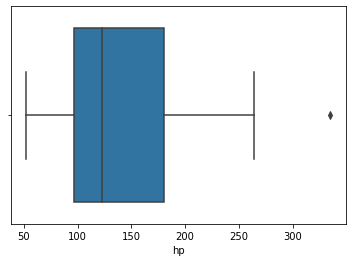

In [ ]:
## Visualizing the data using Box Plot
import seaborn as sns 
sns.boxplot(data= data ,x =data['hp'])

In the above graph, we can clearly see that values above 250 are acting as the outliers.

In [ ]:
## Finding the  IQR (Inter Quartile Range)
Q1 = data['hp'].quantile(0.25)
Q3 = data['hp'].quantile(0.75)
IQR =  Q3 - Q1
IQR

83.5

In [ ]:
###  Defining the upper and the lower bound (1.5*IQR value is considered) :

In [ ]:
# above Upper bound
upper_bound = Q3 + 1.5 *IQR
lower_bound = Q1 -1.5 *IQR
print(upper_bound)
print(lower_bound)

305.25
-28.75


Detecting the outliers 
Any data point that's greater then upper_bound will be consideered as outlier 

In [ ]:
filter = data['hp'] > upper_bound 
data[filter] 

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


Removing the outlier

In [ ]:
filter = data['hp'] < upper_bound 
data[filter] 

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
